# CarND Andvanced Lane Lines
this project goal is 
> 
 1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
 2. Apply a distortion correction to raw images.
 3. Use color transforms, gradients, etc., to create a thresholded binary image.
 4. Apply a perspective transform to rectify binary image ("birds-eye view").
 5. Detect lane pixels and fit to find the lane boundary.
 6. Determine the curvature of the lane and vehicle position with respect to center.
 7. Warp the detected lane boundaries back onto the original image.
 8. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position


## Caliration and Distortion Coefficients

In [364]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline
#%matplotlib qt
import os
#defint value
nx = 9 # number of inside cornets in x
ny = 6  # number of inside corners in y
camera_cal_path = "./camera_cal/"
#load data
image_list = []
file_list = os.listdir(camera_cal_path)
image = cv2.imread(file_list[0])
for file in file_list:
    image_list.append(cv2.imread(camera_cal_path+file))
# gray the image 
image_gray_list = []
for image in image_list:
    image_gray_list.append(cv2.cvtColor(image,cv2.COLOR_BGR2GRAY))
 # calibrate Camera effiecients
objp = np.zeros((nx*ny,3),np.float32)
objp[:,:2]= np.mgrid[0:nx,0:ny].T.reshape(-1,2)
img_points = []
obj_points = []
for gray in image_gray_list:
    ret,corners = cv2.findChessboardCorners(gray,(nx,ny),None)
    if ret:
            img_points.append(corners)
            obj_points.append(objp)
ret,mtx,dist,revcs,tvecs = cv2.calibrateCamera(obj_points,img_points,image_gray_list[0].shape[::-1],None,None)
#print(mtx)
#cv2.draw
#plt.imshow(cv)

## Undistort

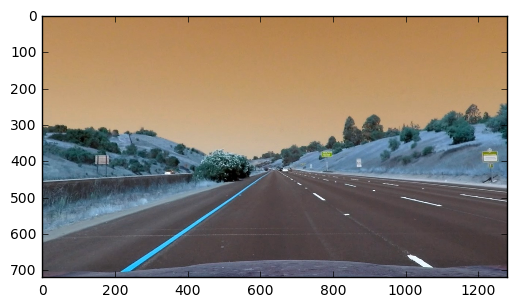

UNDISTORTED IMAGE


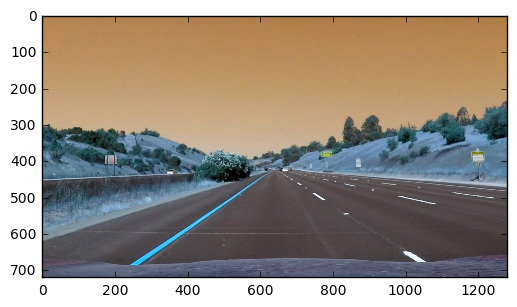

origin image


In [365]:
%matplotlib inline
#%matplotlib qt
#img = cv2.imread("./test_images/test5.jpg")
img = cv2.imread("./test_images/straight_lines1.jpg")
img_size = img.shape[::-1]
# undistort the image
def getUndistortImage(img):
    undistort = cv2.undistort(img,mtx,dist,None,mtx)
    return undistort
print("origin image")
plt.imshow(img)
plt.show()
undistorted_image = getUndistortImage(img)
print("UNDISTORTED IMAGE")
plt.imshow(undistorted_image)
plt.show()

## grayscale image
## sobel for gradient
## color channel


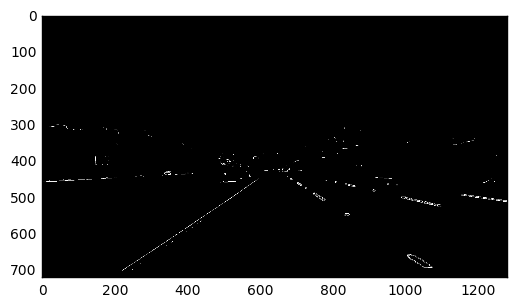

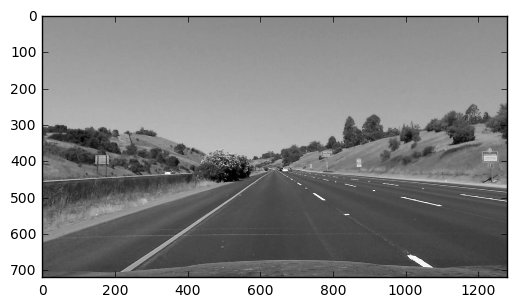

SHOW GRAY IMAGE


In [366]:
def mag_thresh(img,sobel_kernel =15,mag_thresh =(0,255),tan_thresh = (0, np.pi/2),
x_thresh= (0,255),y_thresh = (0,255)):
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    print("SHOW GRAY IMAGE")
    plt.imshow(gray,'gray')
    plt.show()
    # 2) Take the gradient in x and y separately
    sobelX = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize = sobel_kernel)
    sobelY = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize = sobel_kernel)
    abs_SobelX = np.absolute(sobelX)
    abs_SobelY = np.absolute(sobelY)
    # 3) Calculate the magnitude 
    gradmag = np.sqrt(sobelX**2 + sobelY**2)
    tan_Sobel = np.arctan2(np.absolute(sobelY),np.absolute( sobelX))
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    scale_factor = np.max(gradmag)/255 
    #scaled_sobel = np.uint8(gradmag/scale_factor)
    scaled_sobel = (gradmag/scale_factor).astype(np.uint8)

    # 3) Take the absolute value of the derivative or gradient
    abs_sobelx = np.absolute(sobelX)
    abs_sobely = np.absolute(sobelY)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))
    scaled_sobelx = np.uint8(255 * abs_sobelx / np.max(abs_sobelx))
                             
    # 5) Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scaled_sobel)
    mag_binary = np.zeros_like(scaled_sobel)
    sobelx_binary = np.zeros_like(scaled_sobelx)
    sobely_binary = np.zeros_like(scaled_sobely)
    arctan_binary = np.zeros_like(tan_Sobel)

    mag_binary[(scaled_sobel>= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])] = 1
    plt.imshow(mag_binary,'gray')
    plt.show()
    sobelx_binary[(scaled_sobelx >=200) & (scaled_sobelx <= 255)] = 1
    #plt.imshow(sobelx_binary,'gray')
    #plt.show()
    sobely_binary[(scaled_sobely >= 20) & (scaled_sobely <= 40)] = 1
    #plt.imshow(sobely_binary,'gray')
    #plt.show()
    arctan_binary[(tan_Sobel>= tan_thresh[0]) & (tan_Sobel <= tan_thresh[1])] = 1
    # plt.imshow(arctan_binary,'gray')
    # plt.show()
    binary_output[(mag_binary==1) & (arctan_binary == 1) ] = 1
    # plt.imshow(binary_output,'gray')
    # plt.show()
    #binary_output[(scaled_sobel >= mag_thresh[0]) & (scaled_sobel <= mag_thresh[1])
    #& (scaled_sobely >20) & (scaled_sobely <=100)]= 1
    # 
    return binary_output
#& (tan_Sobel >= tan_thresh[0]) & (tan_Sobel <= tan_thresh[1])] = 1
    # 6) Return this mask as your binary_output image
    #@return binary_output
def hls_thresh(image,color_thresh = (0,255)):
    # Convert the Image 2 HLS
    hlsimage = cv2.cvtColor(image,cv2.COLOR_RGB2HLS)
    # Get the sChannel
    s_channel = hlsimage[:,:,2]
    s_binary = np.zeros_like(s_channel)
    # Flitter the Image with color Schannel
    s_binary[(s_channel > color_thresh[0]) &(s_channel <= color_thresh[1] ) ] = 1
    return s_binary
mag_binary = mag_thresh(undistorted_image, sobel_kernel=5, mag_thresh=(120, 200),tan_thresh = (0.7, 1.3),x_thresh=(100,101),y_thresh=(200,255))

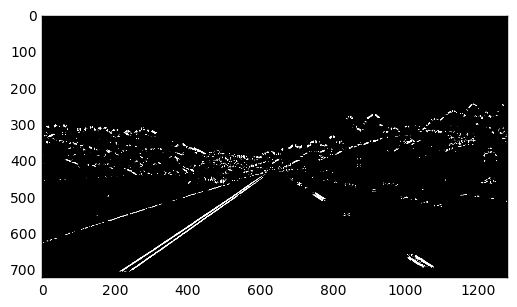

<function matplotlib.pyplot.show>

COMBINED IMAGE


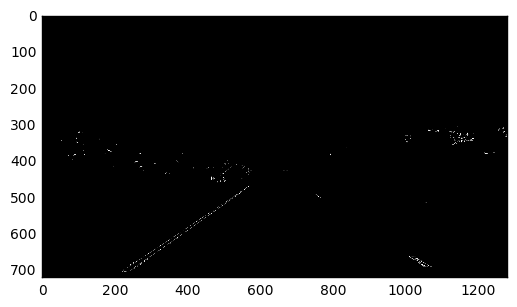

S CHANNEL IMAGE


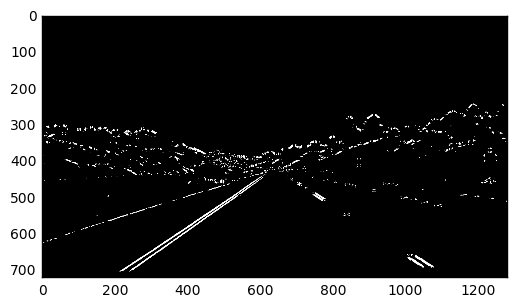

Thresholded Magnitude


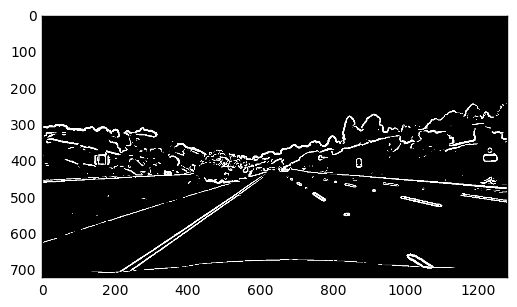

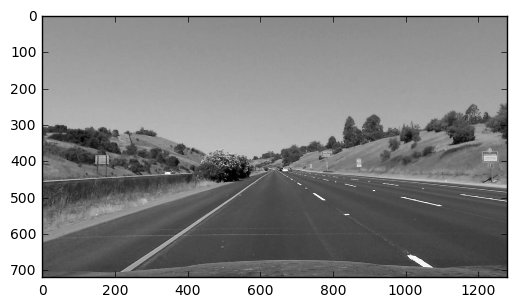

SHOW GRAY IMAGE


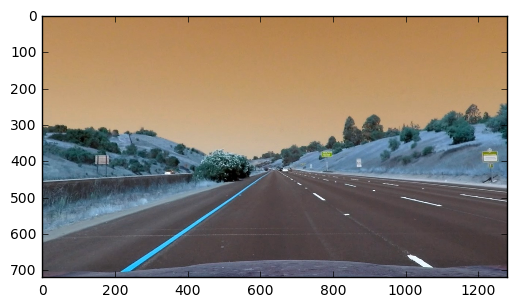

UNDISTORTED IMAGE


In [367]:
#abs_sobelx = np.absolute(sobelx)
#abs_sobely = np.absolute(sobely)
print("UNDISTORTED IMAGE")
plt.imshow(undistorted_image)
plt.show()
#mag_binary = mag_thresh(undistorted_image, sobel_kernel=19, mag_thresh=(60, 255),tan_thresh = (-np.pi/2, np.pi/2))
mag_binary = mag_thresh(undistorted_image, sobel_kernel=15, mag_thresh=(60, 255),tan_thresh = (0.7, 1.3))
print('Thresholded Magnitude')
plt.imshow(mag_binary,'gray')
plt.show()
s_binary = hls_thresh(undistorted_image,color_thresh = (180,220))
print("S CHANNEL IMAGE")
plt.imshow(s_binary,'gray')
plt.show()
combined_binary  =np.zeros_like(mag_binary)
combined_binary[(mag_binary == 1) | (s_binary == 1)] = 1
print("COMBINED IMAGE")
plt.imshow(combined_binary,'gray')
plt.show

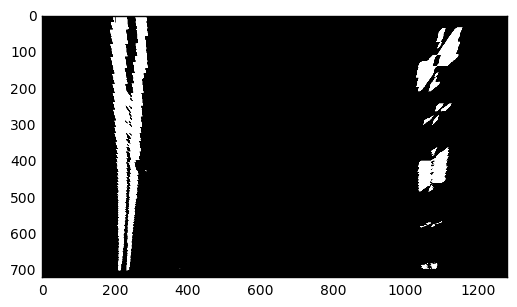

perspecitve image:


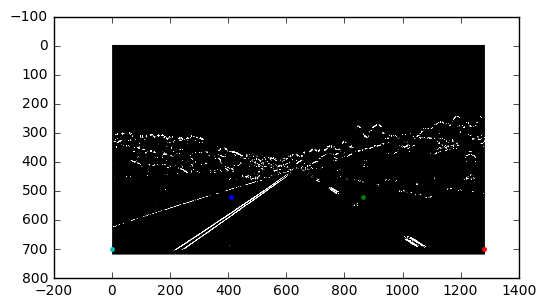

Thresholded Magnitude
darw  the selected point in image


In [368]:
print('Thresholded Magnitude')
#plt.set_title('Thresholded Magnitude', fontsize=50)
#plt.imshow(combined_binary,'gray')
#plt.show()
#get birds view
def getPerspectiveImage(image,source):
 #   offset = 0#100
    img_size = (image.shape[1],img.shape[0])
   # dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
    #                               [img_size[0]-offset, img_size[1]-offset], 
     #                             [offset, img_size[1]-offset]])
    #dst= np.float32([[100,520],[1180,510],[1180,700],[100,700]])
    dst= np.float32([[0,520],[1280,510],[1280,700],[0,700]])
    M = cv2.getPerspectiveTransform(source,dst)
    Minv = cv2.getPerspectiveTransform(dst,source)
    warped = cv2.warpPerspective(image, M,img_size)
    return warped,M,Minv
#src = np.float32([ [445,520],[830,520],[1180,700],[100,700]])
src = np.float32([ [410,520],[865,520],[1280,700],[0,700]])
print("darw  the selected point in image")
plt.imshow(combined_binary,'gray')
for i in range(4):
    plt.plot(src[i][0],src[i][1],'.')
plt.show()

warped_image,M,Minv = getPerspectiveImage(combined_binary,src)
print("perspecitve image:")
plt.imshow(warped_image,'gray')
plt.show()
#plt.imshow(undistorted_image)
#plt.show()
#warped_origin_image = getPerspectiveImage(undistorted_image,src)
#plt.imshow(warped_origin_image)
#plt.show()

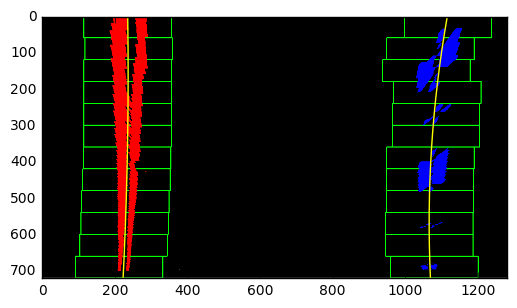

5.0


In [369]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#histogram = np.sum(warped_image[int(warped_image.shape[0]/2):,:], axis=0)
#plt.plot(histogram)
ploty = np.linspace(0, image.shape[0]-1, image.shape[0] )
def findRoadFit(image):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(image[int(image.shape[0]/2):,:], axis=0)
    # Create an output image to draw on and  visualize the result
    out_img = np.dstack((image, image, image))*255
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]/2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint
    # get line bias value
    #line_bias_pixel = ((midpoint - leftx_base) + (rightx_base - midpoint)) /2
    line_bias_pixel = (rightx_base + leftx_base)/2 - midpoint    
    print(line_bias_pixel)
    #print("leftx_base = ",leftx_base)
    #print("rightx_base = ",rightx_base)
    # Choose the number of sliding windows
    nwindows = 12
    # Set height of windows
    window_height = np.int(image.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = image.nonzero()

    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    #print(nonzerox)
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 120
    # Set minimum number of pixels found to recenter window
    minpix = 80
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    #print("IMAGE SHAPE 0 = ", image.shape[0])
    #print("IMAGE SHAPE 1 = ", image.shape[1])
    # Step through the windows one by one
    left_current_x_array,left_current_y_array,right_current_x_array,right_current_y_array = [],[],[],[]
    
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = image.shape[0] - (window+1)*window_height
        win_y_high = image.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),(0,255,0), 2) 
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
        #print("good_left_inds nonzero()")
        #print(((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero())
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds) 
        right_lane_inds.append(good_right_inds)
        # if window ==0 & len(good_right_inds) == 0:
        #     print("window == 0")            
        #     good_right_inds = [2*midpoint- good_left_inds[0],good_left_inds[1]]
        #     print(good_right_inds)
        #     print(len(good_right_inds))
        #     print(len(good_left_inds))
        #     print(good_left_inds)
            
        #if good_right_inds == []:
          
                
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
            lefty_current = np.int(np.mean(nonzeroy[good_left_inds]))
        elif window == 0:
            leftx_current =  leftx_base
            lefty_current = np.int((win_y_low+win_y_high)/2)
        if len(good_right_inds) > minpix:                    
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))            
            righty_current = np.int(np.mean(nonzeroy[good_right_inds]))
        elif window == 0:
            rightx_current =  rightx_base
            righty_current = np.int((win_y_low+win_y_high)/2)
        #print("leftx_current", leftx_current)
        #print("lefty_current", lefty_current)
        #print("leftx_current", rightx_current)
        #print("leftx_current", righty_current)
        left_current_x_array.append(leftx_current)
        left_current_y_array.append(lefty_current)
        right_current_x_array.append(rightx_current)
        right_current_y_array.append(righty_current)
        #print("window = ",window)
    #print("leftx_current = ",leftx_current)
    #print("rightx_current = ",rightx_current)
    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)    
    # Extract left and right line pixel positions
    #print(len(left_lane_inds))
    
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    #print("leftx",leftx)
    # Fit a second order polynomial to each
    #left_fit = np.polyfit(lefty, leftx, 2)
    #right_fit = np.polyfit(righty, rightx, 2)
    left_fit= np.polyfit(left_current_y_array,left_current_x_array,2)
    right_fit = np.polyfit(right_current_y_array,right_current_x_array,2)
    #Visualization    
    #Visualization The Reuslt
    # Generate x and y values for plotting
    ploty = np.linspace(0, image.shape[0]-1, image.shape[0] )
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
    plt.imshow(out_img)
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    #return left_fit,right_fit,ploty,leftx,lefty,rightx,righty
    return left_fit,right_fit,left_current_x_array,left_current_y_array,right_current_x_array,right_current_y_array,line_bias_pixel
left_fit,right_fit,leftx,lefty,rightx,righty,line_bias_pixel = findRoadFit(warped_image)

In [370]:
def findNextRoadFit(image,left_fit,right_fit):
        # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = image.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))
    # Assume you now have a new warped binary image 
    # from the next frame of video (also called "binary_warped")
    # It's now much easier to find line pixels!
    nonzero = image.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])

    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + left_fit[2] + margin))) 
    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + right_fit[2] + margin)))  
    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    # Generate x and y values for plotting
    ploty = np.linspace(0, image.shape[0]-1,image.shape[0] )    
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((image,image,image))*255
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
    out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    plt.imshow(result)
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    plt.xlim(0, 1280)
    plt.ylim(720, 0)
    return left_fit,right_fit,ploty,leftx,lefty,rightx,righty
    #return left_fit,right_fit,ploty,leftx
    

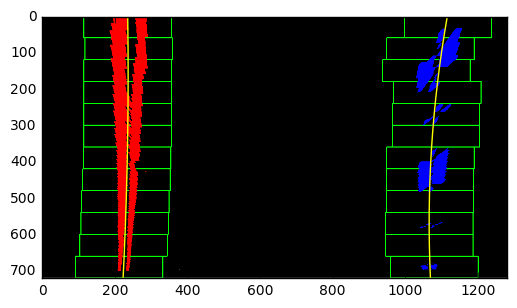

5.0


In [371]:
#GET PLOYFIT
#left_fit,right_fit,leftx,lefty,rightx,righty = findRoadFit(warped_image)
left_fit,right_fit,leftx,lefty,rightx,righty,line_bias_pixel = findRoadFit(warped_image)
#print(left_fit)
#print(right_fit)
#findNextRoadFit(warped_image,left_fit,right_fit)


In [372]:

def calculateCurverad(left_fit,right_fit):
    y_eval = np.max(ploty)
    left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
    right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
    print(left_curverad, right_curverad)
    return left_curverad,right_curverad
def calculateCurveradMeters(leftx,rightx,lefty,righty):
    #Define conversions in x and y from pixels space to meters
    y_eval = np.max(leftx)
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    # Fit new polynomials to x,y in world space
    #print(ploty)
    #print(leftx)
    #print(rightx)
    #leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
    #rightx = rightx[::-1]  # Reverse to match top-to-bottom in y
    #print(len(ploty*ym_per_pix))
    #print(len(leftx*xm_per_pix))
    left_fit_cr = np.polyfit(lefty*ym_per_pix, leftx*xm_per_pix, 2)
    right_fit_cr = np.polyfit(righty*ym_per_pix, rightx*xm_per_pix, 2)
    # Calculate the new radii of curvature
    
    left_curverad_meters = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
    right_curverad_meters = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
    # Now our radius of curvature is in meters
    if left_curverad_meters >1000:
        left_curverad_meters = 0
    if right_curverad_meters >1000:
        right_curverad_meters = 0
    print(left_curverad_meters, 'm', right_curverad_meters, 'm')
    return left_curverad_meters,right_curverad_meters

In [373]:
calculateCurverad(left_fit,right_fit)
calculateCurveradMeters(np.array(leftx),
                        np.array(rightx),
                        np.array(lefty),
                        np.array(righty))
print(line_bias_pixel)
print("distance={}m".format(3.7/700 * line_bias_pixel))


11322.5169489 3243.59628487
0 m 0 m
5.0
distance=0.02642857142857143m


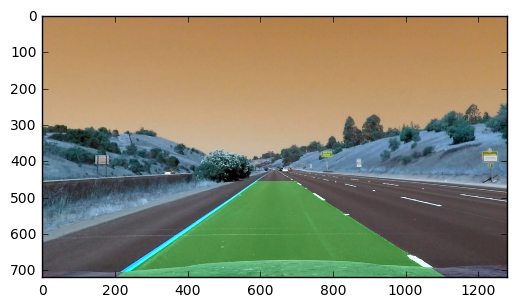

In [375]:
# Create an image to draw the lines on
warp_zero = np.zeros_like(warped_image).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

ploty = np.linspace(0, image.shape[0]-1, image.shape[0] )

left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv,
                              (undistorted_image.shape[1], undistorted_image.shape[0])) 
# Combine the result with the original image
result = cv2.addWeighted(undistorted_image, 1, newwarp, 0.3, 0)
plt.imshow(result)